# Propagation of Hole waveguide (Antiguide)

Empty hole in glass. N0 configuration in Bird


In [288]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact, plotlogf
from scipy.optimize import newton
from scipy.integrate import quad
from IPython.display import Video, HTML

import json

plt.style.use('dark_background')
%matplotlib widget

In [289]:
A = SlabExact(scale=1e-6, Ts=[2., 2., 2.], xrefs=[300, 500, 300],
              ns=[1.44, 1, 1.44], wl=1e-6, symmetric=True)


In [290]:
def quadratic_piecewise(x):
    conds = [(x<-.5), ((-.5<=x)*(x<=.5)), (x>.5)]
    funcs = [0, lambda x: .25-x**2, 0]
    return np.piecewise(x, conds, funcs)

def uneven_cubic(x):
    conds = [(x<-.5), ((-.5<=x)*(x<=.5)), (x>.5)]
    funcs = [0, lambda x: 5*(x+.1)*(.25-x**2), 0]
    return np.piecewise(x, conds, funcs)
    
def modified_dist(x):
    return (x-1/4) * np.exp(-(x-1/2)**2)  

def odd_modified_dist(x):
    return x * np.exp(-x**2)
    
def normal_dist(x):
    return np.exp(-x**2)

In [291]:
# Set input function
f0 = quadratic_piecewise
f0_shifted = lambda x: f0(x) + 1
# Set input field type
field_type = 'TE'

/home/pv/local/slab/slab.py:1563: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=legend_fontsize)


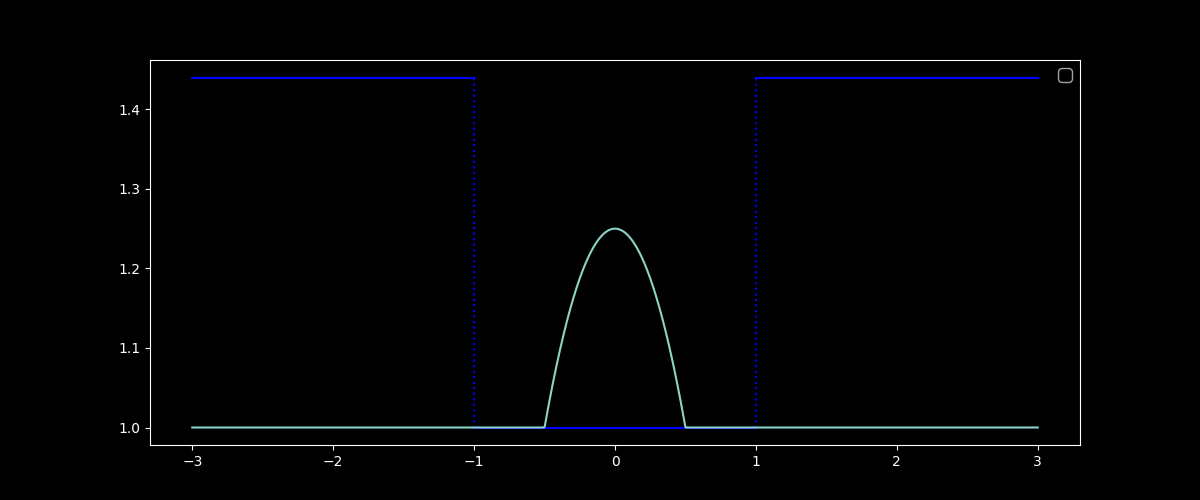

In [292]:
A.plot_refractive_index()
A.add_1d_plot(f0_shifted)

# Check for guided modes

Doesn't seem like it should have any

In [293]:
mode_type = 'guided'


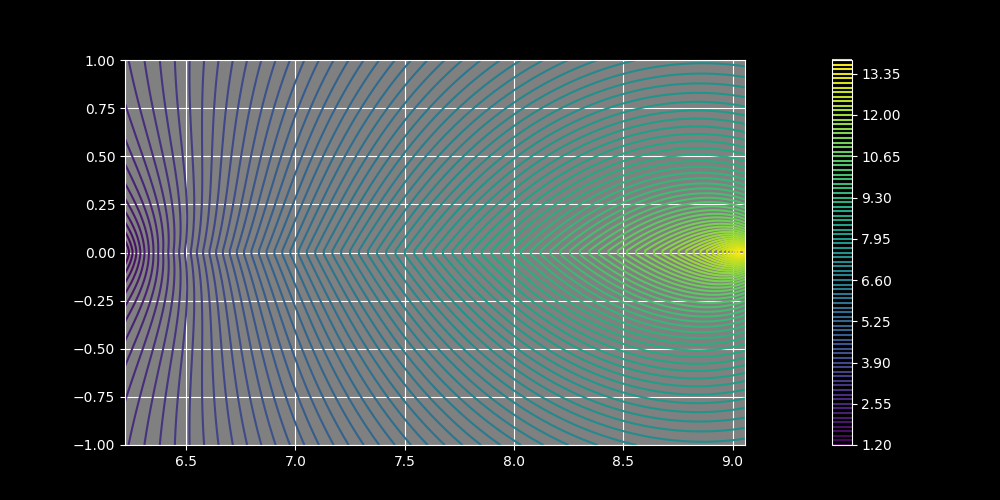

In [294]:
plotlogf(A.determinant, .99*A.K_low, 1.001*A.K_high, -1,1, field_type, mode_type,
         figsize=(10,5),iref=100, rref=100,levels=100)

No guided modes.

## Leaky Modes

In [295]:
mode_type = 'leaky'

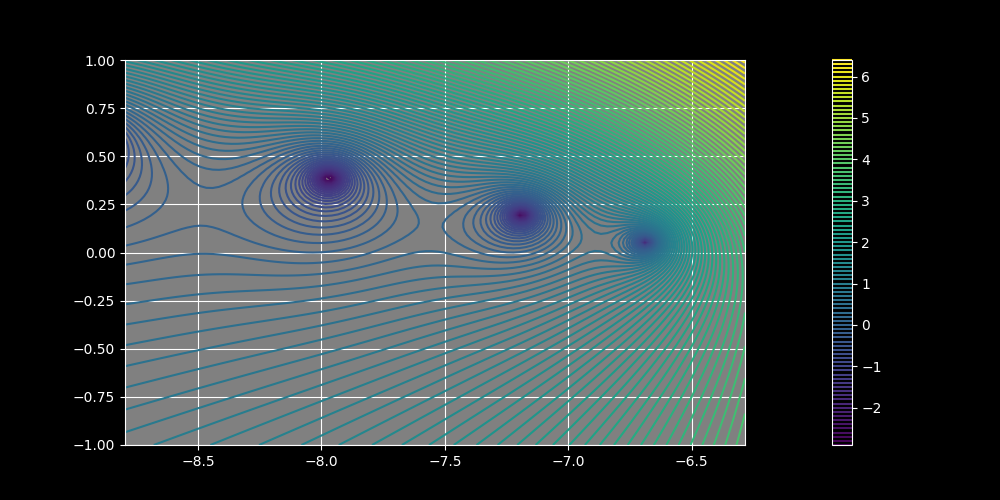

In [296]:
plotlogf(A.determinant_Z, -1.4*A.K_low, -A.K_low, -1,1, field_type, mode_type,
         figsize=(10,5),iref=100, rref=100,levels=100)

In [297]:
Z0 = newton(A.determinant_Z, np.array(-1.01*A.K_low+.05j), args=(field_type, mode_type))
print(Z0)
plt.plot(Z0.real, Z0.imag, 'ro');

(-6.685128839583127+0.05373814388211981j)


In [298]:
FsZ = A.fields_Z(Z0, field_type=field_type, mode_type=mode_type)


In [299]:
xs = np.linspace(-10, 10, 600)

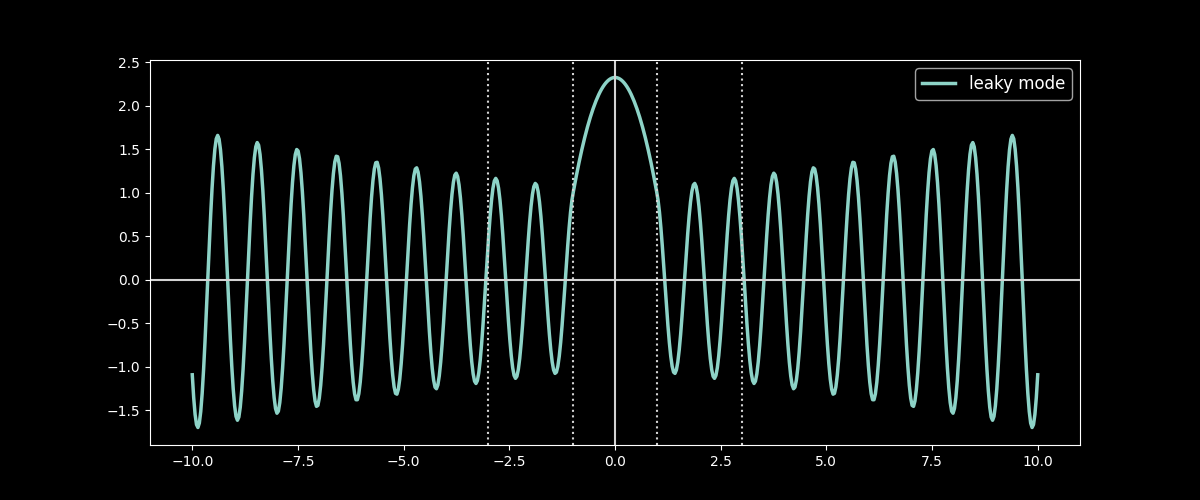

In [300]:
A.plot_field_1d(FsZ, xs=xs, linewidth=2.5, label='leaky mode');

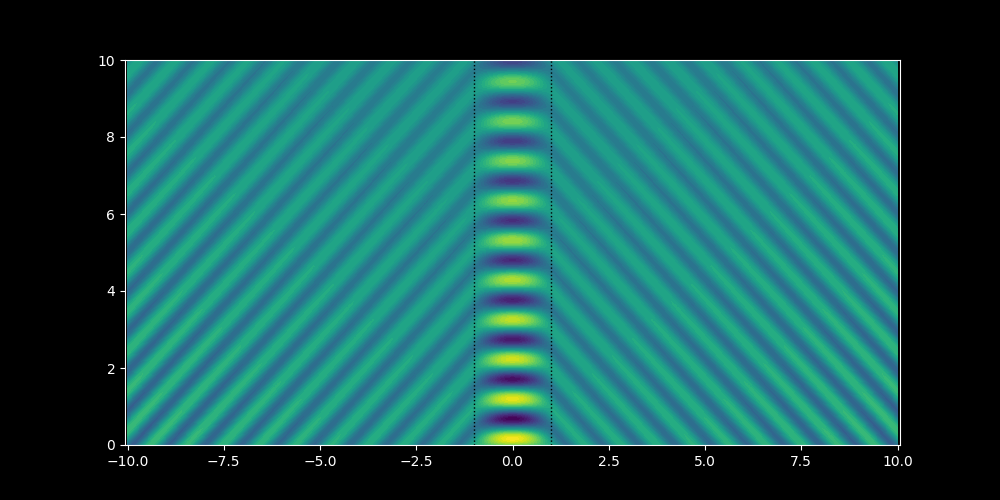

In [301]:
A.plot_field_2d(FsZ, xs=xs, zmin=0, zmax=10, zref=500, colorbar=False, figsize=(10,5))
plt.axis('equal');

## We want real part of Z to be negative for our ansatz (wait how do I know this?)

This corresponds to beta with positive real part to give decay via 
$$e^{i\beta z} = e^{i(a + bi) z} = e^{-bz}\, \big(\cos(az) + i\sin(az)\big).$$

In Z plane though, this means we need to set mode_type=guided.  All this is doing to finding Z values for which $M_{22} = 0.$  Algebra of radiation mode coefficients shows that these are proportional to 

$$ \sqrt{\frac{M_{22}}{b - M_{21}}}.$$

Note this is using typical matrix indexing starting from 1 (not pythonic). The value $b$ is 1 for symmetric geometries, which we'll restrict ourselves to for now.  So there will be a pole in the coefficients when $ b = M_{21}$ and $M_{22}\neq 0$.  But this is really inconsistent...

# Propagation of input



In [303]:
Propagator_Class = A.propagator()

In [304]:
paper_method=False

In [305]:
P1e = Propagator_Class(f0=f0, Lx=-.5, Rx=.5,
                       LZ=0.001, RZ=6, NZ=100,
                       field_type=field_type, conjugate=False,
                       sign='+1', paper_method=paper_method)
# P1o = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
#                      LZ=0.001, RZ=6, NZ=100, 
#                      field_type=field_type, 
#                      sign='-1', paper_method=paper_method)

 99% (99 of 100) |###################### | Elapsed Time: 0:00:01 ETA:   0:00:00

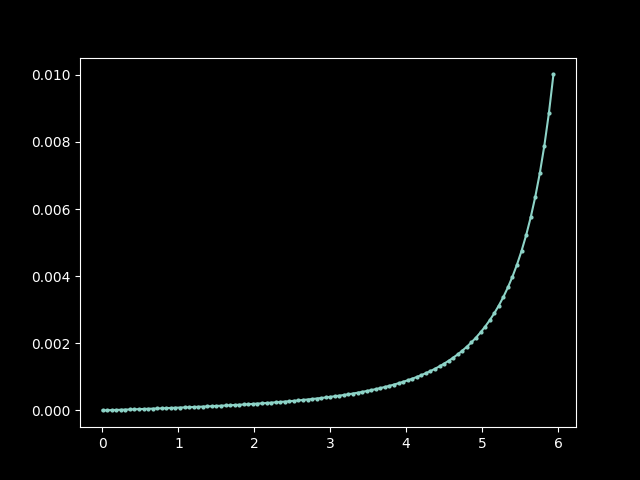

In [306]:
plt.close('all')
plt.plot(P1e.Zs, np.abs(P1e.alphas.real), marker='o', markersize=2)
# plt.plot(P1o.Zs, np.abs(P1o.alphas.real), marker='o', markersize=2)

In [21]:
P2e = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, conjugate=False,
                       LZ=6, RZ=7, NZ=100,field_type=field_type,
                       sign='+1', paper_method=paper_method)
# P2o = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
#                      LZ=6, RZ=7, NZ=100, 
#                      field_type=field_type, 
#                      sign='-1', paper_method=paper_method)

 98% (98 of 100) |###################### | Elapsed Time: 0:00:00 ETA:   0:00:00

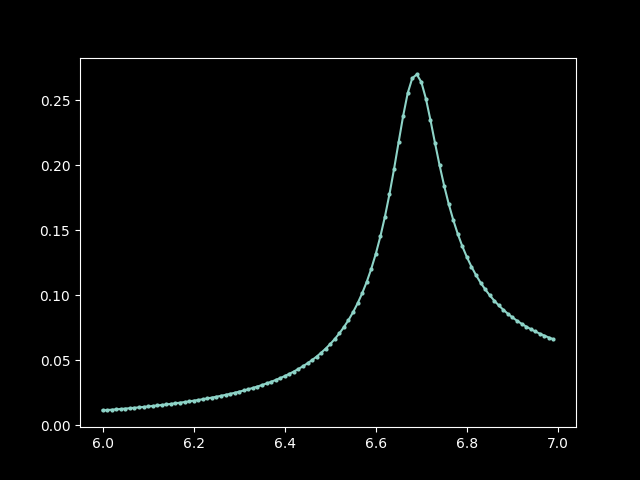

In [22]:
plt.close('all')
plt.plot(P2e.Zs, np.abs(P2e.alphas.real), marker='o', markersize=2)
# plt.plot(P2o.Zs, np.abs(P2o.alphas.real), marker='o', markersize=2)

In [23]:
P3e = Propagator_Class(f0=f0, Lx=-.5, Rx=.5,
                       LZ=7, RZ=A.Z_evanescent.real, NZ=200,
                       field_type=field_type, conjugate=False,
                       sign='+1', paper_method=paper_method)
# P3o = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
#                      LZ=7, RZ=A.Z_evanescent.real, NZ=200, 
#                      field_type=field_type, 
#                      sign='-1', paper_method=paper_method)

 96% (193 of 200) |##################### | Elapsed Time: 0:00:01 ETA:   0:00:00

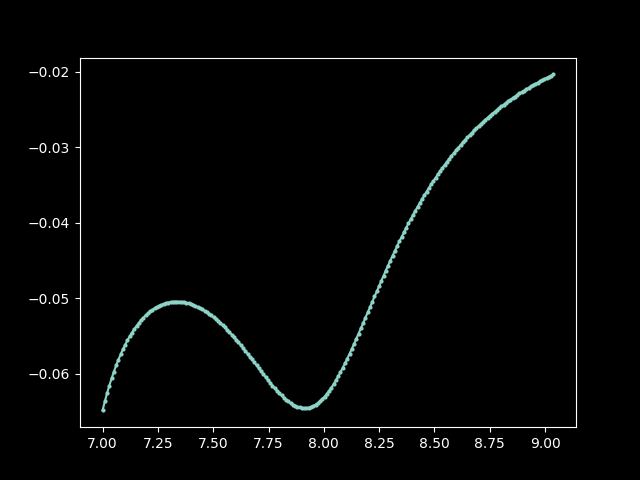

In [24]:
plt.close('all')
plt.plot(P3e.Zs, P3e.alphas.real, marker='o', markersize=2)
# plt.plot(P3o.Zs, P3o.alphas.real, marker='o', markersize=2)

In [25]:
P4e = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
                     LZ=A.Z_evanescent.real, RZ=14, NZ=100, 
                     field_type=field_type, conjugate=False,
                     sign='+1', paper_method=paper_method)
# P4o = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
#                      LZ=A.Z_evanescent.real, RZ=14, NZ=100, 
#                      field_type=field_type, 
#                      sign='-1', paper_method=paper_method)

 92% (92 of 100) |#####################  | Elapsed Time: 0:00:00 ETA:   0:00:00

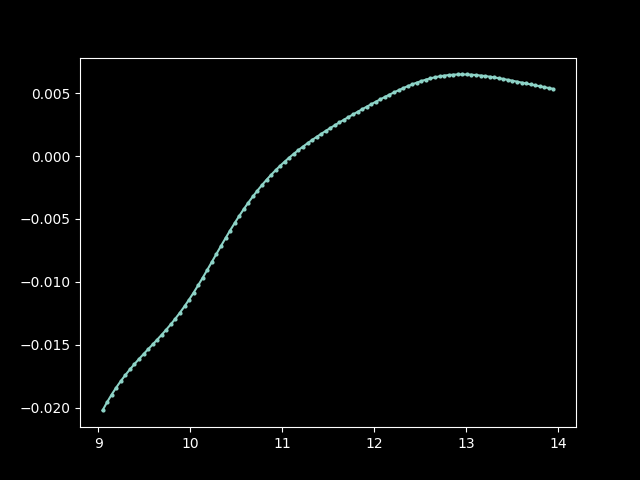

In [26]:
plt.close('all')
plt.plot(P4e.Zs, P4e.alphas.real, marker='o', markersize=2)
# plt.plot(P4o.Zs, P4o.alphas.real, marker='o', markersize=2)

In [27]:
P5e = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
                     LZ=14, RZ=20, NZ=150, 
                     field_type=field_type, conjugate=False,
                     sign='+1', paper_method=paper_method)
# P5o = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
#                      LZ=14, RZ=20, NZ=150, 
#                      field_type=field_type, 
#                      sign='-1', paper_method=paper_method)

 96% (145 of 150) |##################### | Elapsed Time: 0:00:01 ETA:   0:00:00

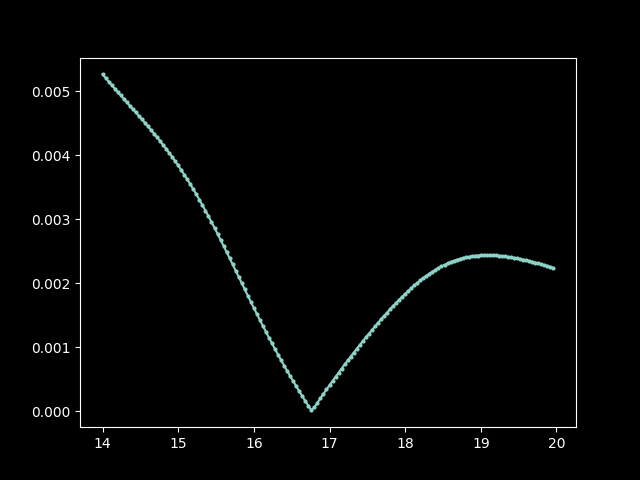

In [28]:
plt.close('all')
plt.plot(P5e.Zs, np.abs(P5e.alphas.real), marker='o', markersize=2)
# plt.plot(P5o.Zs, np.abs(P5o.alphas.real), marker='o', markersize=2)

In [29]:
P6e = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
                     LZ=20, RZ=50, NZ=100,
                       field_type=field_type, conjugate=False,
                     sign='+1', paper_method=paper_method)
# P6o = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
#                      LZ=20, RZ=50, NZ=200, 
#                      field_type=field_type, 
#                      sign='-1', paper_method=paper_method)

 99% (99 of 100) |###################### | Elapsed Time: 0:00:02 ETA:   0:00:00

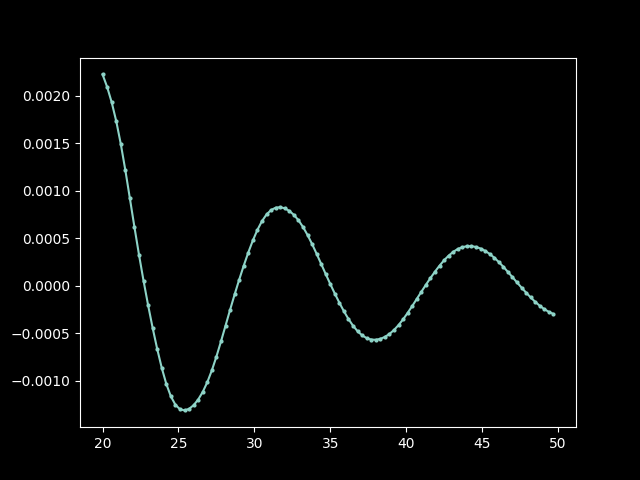

In [30]:
plt.close('all')
plt.plot(P6e.Zs, P6e.alphas.real, marker='o', markersize=2)
# plt.plot(P6o.Zs, P6o.alphas.real, marker='o', markersize=2)

In [31]:
# P7 = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
#                      LZ=50, RZ=100, NZ=150, 
#                      field_type=field_type, 
#                      sign='+1', paper_method=paper_method)

In [32]:
# plt.close('all')
# plt.plot(P7.Zs, P7.alphas.real, marker='o', markersize=2)

In [33]:
# P8 = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
#                      LZ=100, RZ=150, NZ=100, 
#                      field_type=field_type, 
#                      sign='+1', paper_method=paper_method)

In [34]:
# plt.close('all')
# plt.plot(P8.Zs, P8.alphas.real, marker='o', markersize=2)

### Combine propagators into one function

In [38]:
Pse = [P1e, P2e, P3e, P4e, P5e, P6e]
# Pso = [P1o, P2o, P3o, P4o, P5o, P6o]
Ps = Pse 
portion = 'full'

full = lambda x: sum([P.slice_propagate(x, portion=portion) for P in Ps])
Full = lambda x, z : sum([P.propagate(x, zs=z, portion=portion) for P in Ps])

diff = lambda x: full(x) - f0(x)
ratio = lambda x: full(x) / f0(x)

# 1D Plot


In [308]:
xs = np.linspace(-6, 6, 10000)


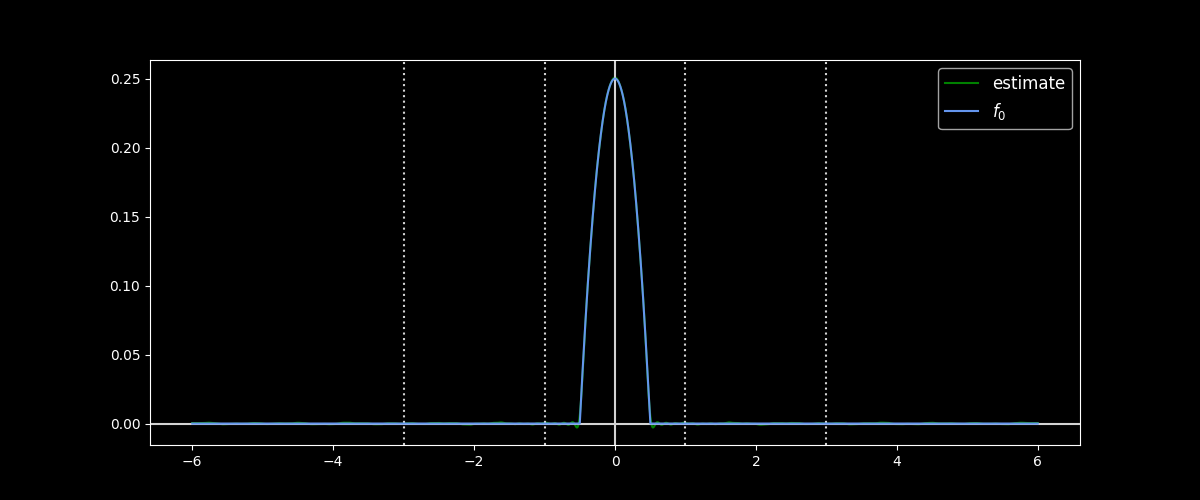

In [309]:
A.plot_field_1d(full, xs=xs, color='g', label='estimate');
A.add_1d_plot(f0, xs=xs, color='cornflowerblue', label='$f_0$')
# A.add_1d_plot(diff, xs=xs, color='g', label='difference')
# A.add_1d_plot(ratio, xs=xs)

## Slice along Z axis

In [41]:
portion = 'full'
slice_at = 0
constant_variable = 'x'

full_z = lambda x: sum([P.slice_propagate(x, portion=portion, slice_at=slice_at, constant_variable=constant_variable) for P in Ps])


/home/pv/local/slab/slab.py:1499: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=legend_fontsize)


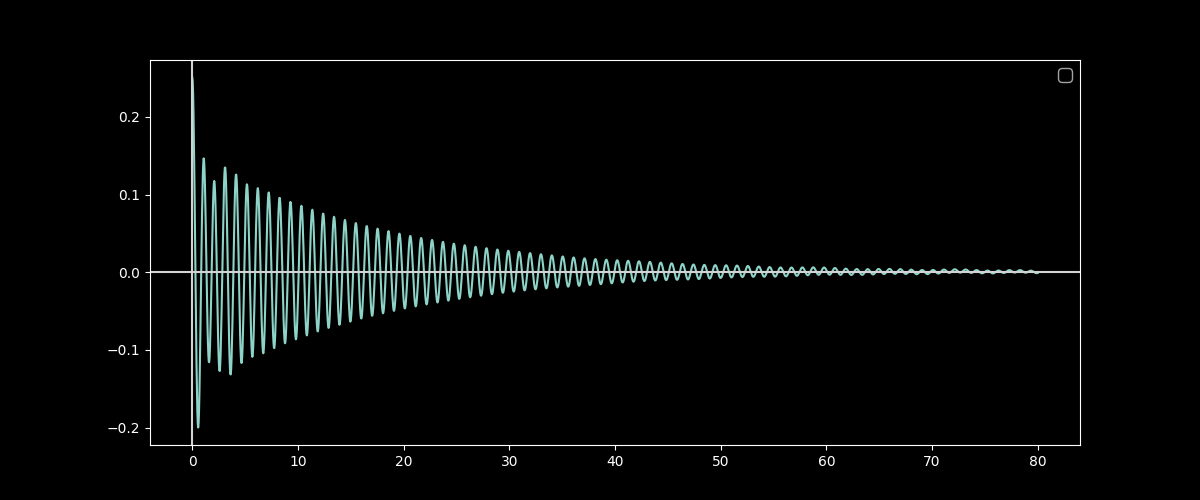

In [42]:
A.plot_field_1d(full_z, xs=np.linspace(0,80,2000), part='real', plot_Rhos=False);


## 2D Plots

In [43]:
xs = np.linspace(-10, 10, 800)

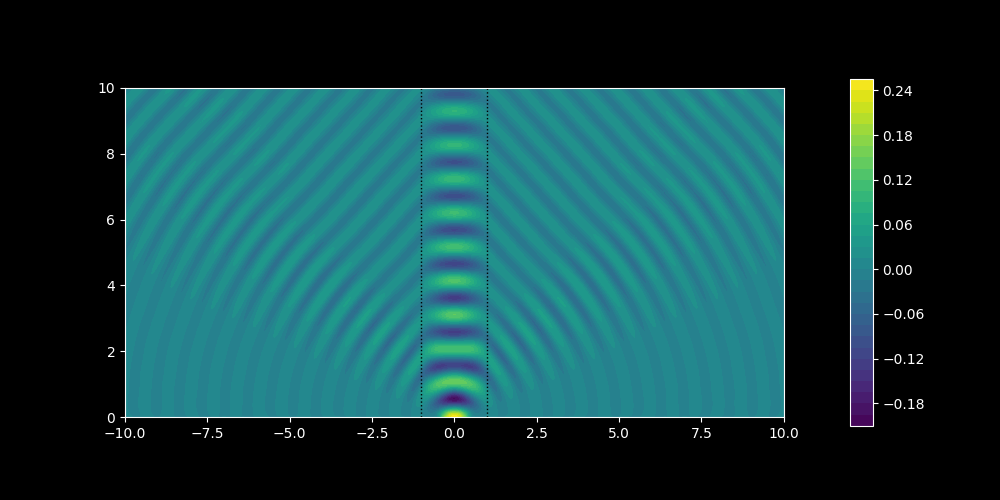

In [47]:
A.plot_field_2d(Full, xs=xs, zmin=0, zmax=10, zref=200, maxdim=10, colorbar=True);


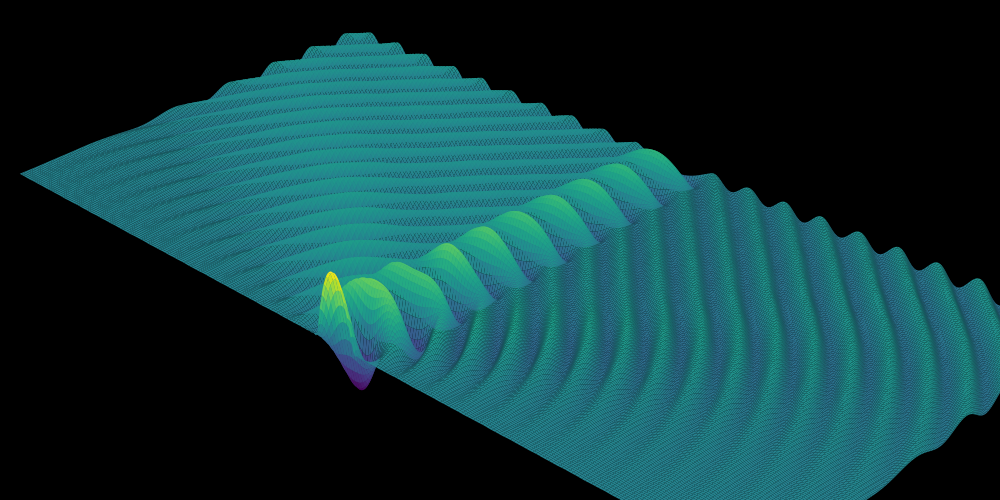

In [48]:
A.plot_field_2d_surface(Full, xs=xs, colorbar=False, zoom=3.5,
                        azim=-47, elev=30, 
                        zmax=10, zref=200,
                        rstride=1, cstride=3);

In [49]:
# Slow animation cell

# A.animate_field_2d_surface(Full, 'true_field_3d_animation', fps=20, secs=2,  xs=np.linspace(-6,6,200), zmin=0, zmax=10, zref=220,
#                            rstride=1, cstride=1, part='real', color_min=-.2, color_max=.2, azim=-47, elev=30, zoom=3.5,
#                           dpi=300)

In [50]:
HTML("""
<video controls id="theVideo"> <source src="true_field_3d_animation.mp4"> </video>
<script> video = document.getElementById("theVideo")
video.width = 1100; video.playbackRate = 1; video.loop = true; video.autoplay = true;
</script> """)

## Compare to leaky mode

## Forming leaky mode from contour integral

Leaky modes should arise from residues when deforming contour of integration to steepest descent path.  But I don't know how to calculate the residuals analytically.  Here I try to do it numerically by doing a circular contour integration around a leaky mode propagation constant in the complex plane.  First I'll grab that propagation constant in the Z plane:

### Paper method

We discovered from the notebook Integrand/Full/Exact_Delta_Integrand_and_Contour_Integrals that with the paper method there are poles in the negative real part of the complex plane that appear to work.  These appear at what would be "leaky" mode_types with negative real parts.  Need to understand how it is that these can give correct decay and propagation direction.

In [234]:
mode_type='leaky'
paper_method = True

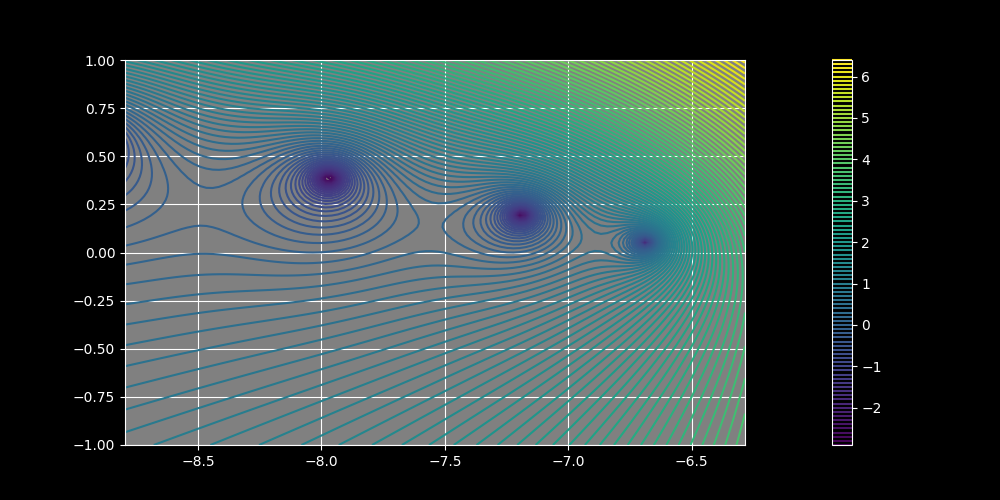

In [235]:
plotlogf(A.determinant_Z, -1.4*A.K_low, -A.K_low, -1,1, field_type, mode_type,
         figsize=(10,5),iref=100, rref=100,levels=100)

In [236]:
Z_leaky_theirs = newton(A.determinant_Z, -6.5, args=('TE', mode_type))
print(Z_leaky_theirs, A.determinant_Z(Z_leaky_theirs, mode_type=mode_type))
plt.plot(Z_leaky_theirs.real, Z_leaky_theirs.imag, 'ro');

(-6.685128839583154+0.0537381438821302j) (1.6176769136128868e-14-5.5945532922631366e-15j)


In [237]:
circ_contour_theirs = {'center': Z_leaky_theirs, 'radius': 1e-4, 'N':50}

In [238]:
P_leaky_even_theirs = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
                     LZ=100, RZ=150, NZ=10, 
                     field_type=field_type, conjugate=False,
                     sign='+1', circ_contour=circ_contour_theirs, paper_method=True)
P_leaky_odd_theirs = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
                     LZ=100, RZ=150, NZ=10, 
                     field_type=field_type, conjugate=False,
                     sign='-1', circ_contour=circ_contour_theirs, paper_method=True)

 96% (48 of 50) |####################### | Elapsed Time: 0:00:00 ETA:   0:00:00

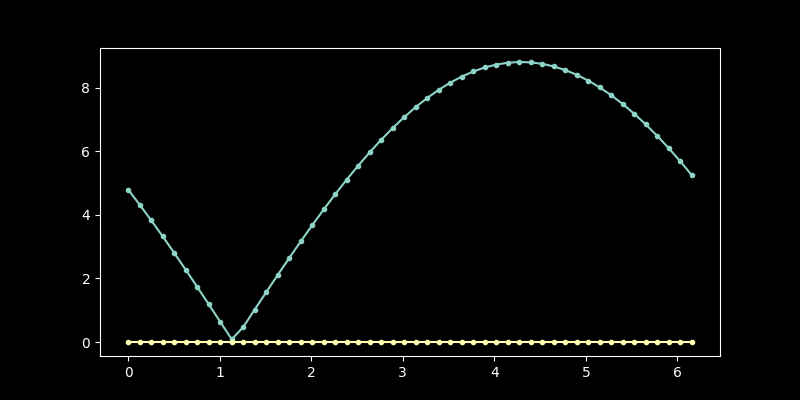

In [239]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(8,4))
ax.plot(P_leaky_even_theirs.ts,  np.abs(P_leaky_even_theirs.alphas), markersize=3, marker='o');
ax.plot(P_leaky_odd_theirs.ts,  np.abs(P_leaky_odd_theirs.alphas), markersize=3, marker='o');

In [240]:
P_ls_theirs = [P_leaky_even_theirs, P_leaky_odd_theirs]
portion = 'full'

full_leaky_theirs = lambda x : sum([P.slice_propagate(x, portion=portion) for P in P_ls_theirs])
Full_leaky_theirs = lambda x, z : sum([P.propagate(x, zs=z, portion=portion) for P in P_ls_theirs])
Leaky_Diff_theirs = lambda x,z: Full(x,z) - Full_leaky_theirs(x, z)

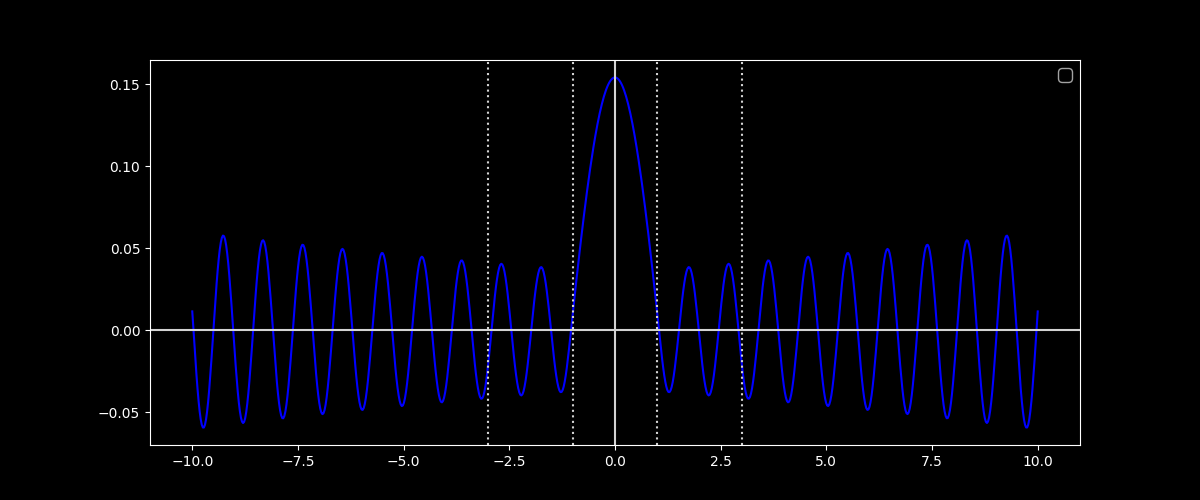

In [241]:
A.plot_field_1d(full_leaky_theirs, xs=xs, part='real', color='blue');

### Asymptotics of true and leaky mode (found with contour integral)



In [242]:
slice_at_x = 0
constant_variable = 'x'

full_z_leaky_theirs = lambda z: sum([P.slice_propagate(z, slice_at=slice_at_x, constant_variable=constant_variable) for P in P_ls_theirs])
full_z = lambda z: sum([P.slice_propagate(z, slice_at=slice_at_x, constant_variable=constant_variable) for P in Ps])


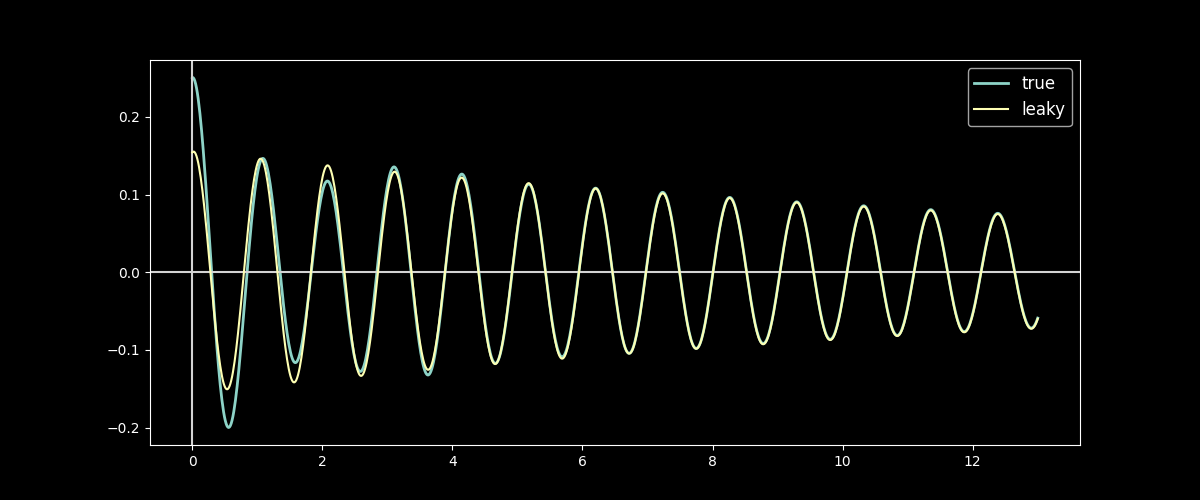

In [311]:
part='real'
A.plot_field_1d(full_z, xs=np.linspace(0, 13, 1000), part=part, plot_Rhos=False, linewidth=2,label='true');
A.add_1d_plot(full_z_leaky_theirs, xs=np.linspace(0, 13, 1000), part=part, label='leaky');


### 2d Plots of real field and leaky mode field

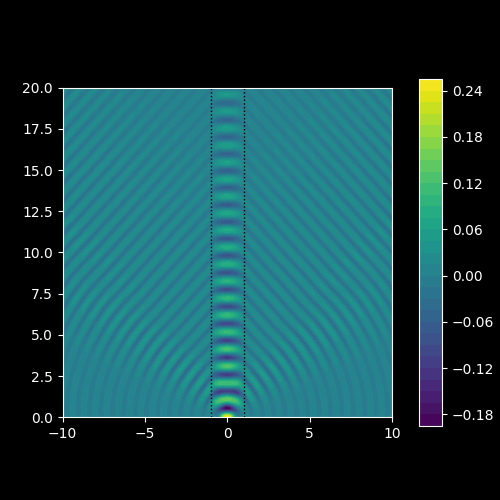

In [251]:
fig, ax = A.plot_field_2d(Full, xs=xs, zmin=0, zmax=20, zref=200, maxdim=5, orient='vertical');

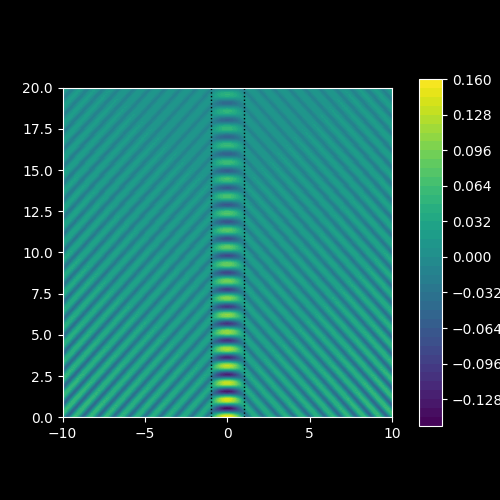

In [252]:
A.plot_field_2d(Full_leaky_theirs, xs=xs, zmin=0, zmax=20, zref=200, maxdim=5, orient='vertical');

Difference between fields above.

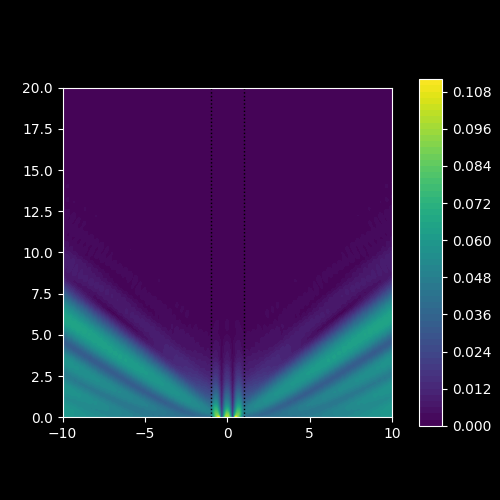

In [253]:
A.plot_field_2d(Leaky_Diff_theirs, xs=xs, zmin=0, zmax=20, zref=200, maxdim=5, 
                levels=60, orient='vertical', part='norm');


### Animations

#### 1D 

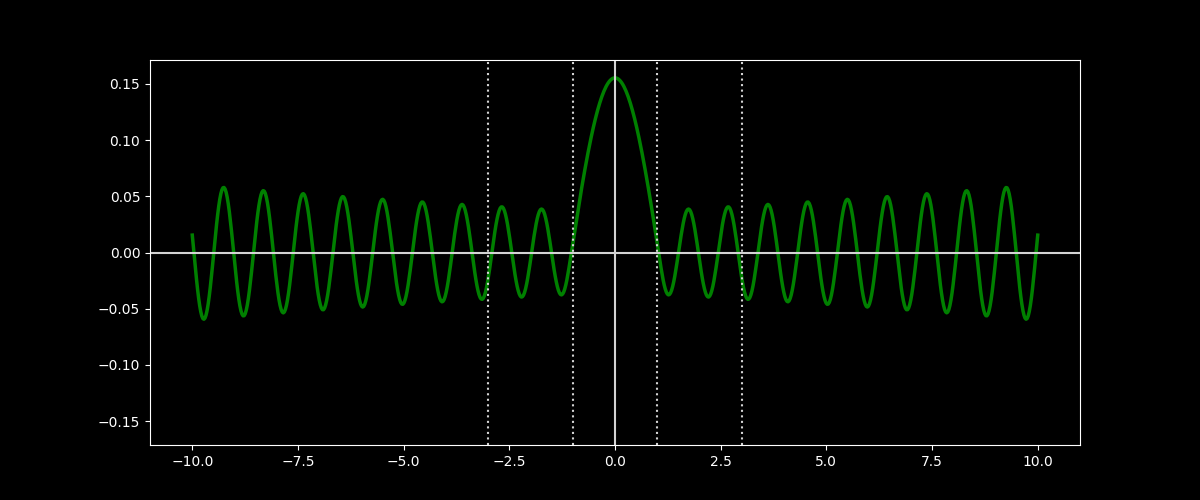

In [258]:
A.animate_field_1d(full_leaky_theirs, 'leaky', xs=xs, linewidth=2.5, secs=3, fps=32, color='g')

In [261]:
Video('leaky.mp4', html_attributes="controls loop")


#### 2D

In [74]:
# A.animate_field_2d(Full, 'true_field_2d_animation', xs=xs, zs=np.linspace(0,10,300), color_max=.25, color_min=-.25,
#                    figsize=(10,5), secs=2)

In [75]:
# A.animate_field_2d(Full_leaky_theirs, 'leaky_mode_antiguide_contour',xs=xs, zs=np.linspace(0,10,300),
#                    color_max=.25, color_min=-.25,figsize=(10,5), secs=2)

In [76]:
Video('true_field_2d_animation.mp4', html_attributes="controls loop autoplay")


In [77]:
Video('leaky_mode_antiguide_contour.mp4', html_attributes="controls loop autoplay")


#### Animate Leaky mode in 3D

In [72]:
# Slow animation cell

# A.animate_field_2d_surface(Full_leaky_theirs, 'leaky_field_3d_animation', fps=20, secs=2,  xs=np.linspace(-6,6,200), zmin=0, zmax=10, zref=220,
#                            rstride=1, cstride=1, part='real', color_min=-.2, color_max=.2, azim=-47, elev=30, zoom=3.5, dpi=300)

In [108]:
HTML("""
<video controls id="theVideo3"> <source src="true_field_3d_animation.mp4"> </video>
<video controls id="theVideo4"> <source src="leaky_field_3d_animation.mp4"> </video>
<script> video3 = document.getElementById("theVideo3")
video4 = document.getElementById("theVideo4")
video3.width = 650; video3.playbackRate = 1; video3.loop = true; video3.autoplay = true;
video4.width = 650; video4.playbackRate = 1; video4.loop = true; video4.autoplay = true;
</script> """)

### Our method

This still has issues: all the contour integrals go to zero.

In [262]:
mode_type='leaky'

paper_method = False

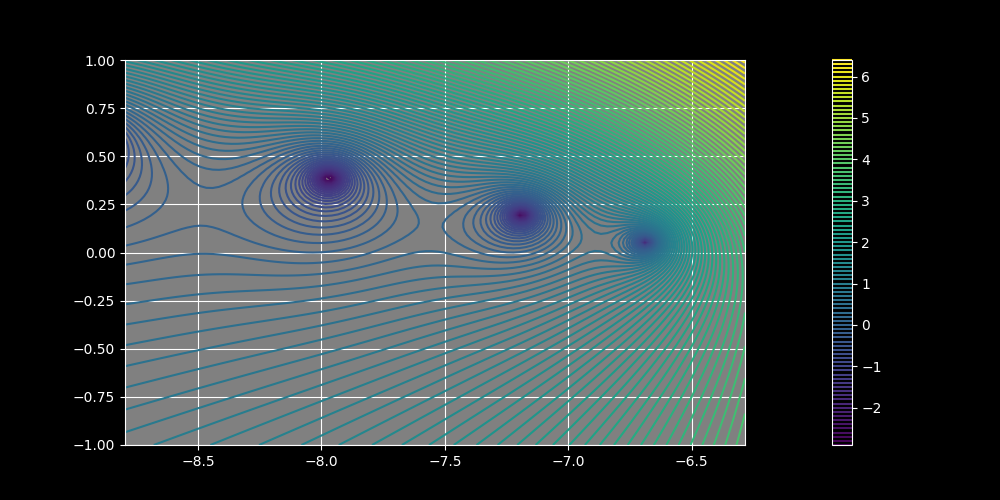

In [263]:
plotlogf(A.determinant_Z, - 1.4*A.K_low, -A.K_low, -1,1, field_type, mode_type,
         figsize=(10,5),iref=100, rref=100,levels=100)

hi kirbee ❤️

In [264]:
Z_leaky = newton(A.determinant_Z, -6.5, args=('TE', mode_type))
Z_leaky, A.determinant_Z(Z_leaky, mode_type=mode_type)
plt.plot(Z_leaky.real, Z_leaky.imag, 'ro');

In [265]:
circ_contour = {'center': Z_leaky, 'radius': 1e-4, 'N':50}

In [266]:
P_leaky_even = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
                     LZ=100, RZ=150, NZ=10, 
                     field_type=field_type, conjugate=False,
                     sign='+1', circ_contour=circ_contour, paper_method=paper_method)
P_leaky_odd = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
                     LZ=100, RZ=150, NZ=10, 
                     field_type=field_type, conjugate=False,
                     sign='-1', circ_contour=circ_contour, paper_method=paper_method)

 96% (48 of 50) |####################### | Elapsed Time: 0:00:00 ETA:   0:00:00

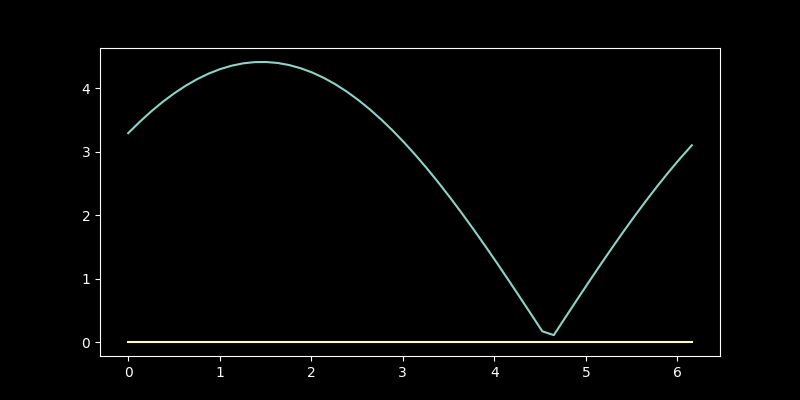

In [267]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(8,4))
ax.plot(P_leaky_even.ts,  np.abs(P_leaky_even.alphas.imag));
ax.plot(P_leaky_odd.ts,  np.abs(P_leaky_odd.alphas));

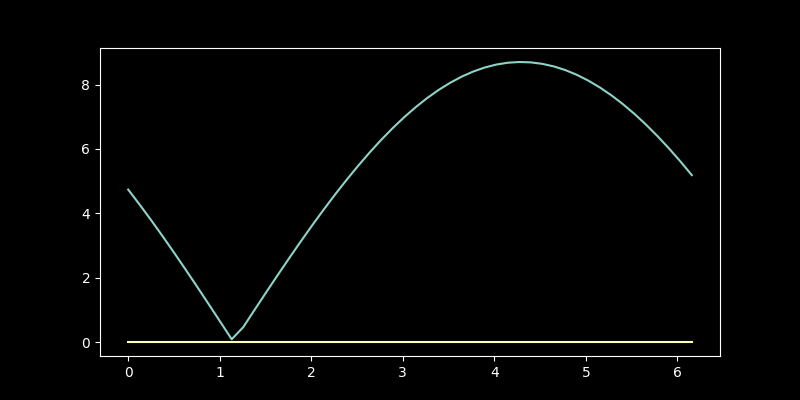

In [268]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(8,4))
ax.plot(P_leaky_even_theirs.ts,  np.abs(P_leaky_even_theirs.alphas.real));
ax.plot(P_leaky_odd_theirs.ts,  np.abs(P_leaky_odd_theirs.alphas));

In [269]:
P_ls = [P_leaky_even, P_leaky_odd]

full_leaky = lambda x : sum([P.slice_propagate(x) for P in P_ls])
Full_leaky = lambda x, z : sum([P.propagate(x, zs=z) for P in P_ls])

/home/pv/local/slab/slab.py:1499: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=legend_fontsize)


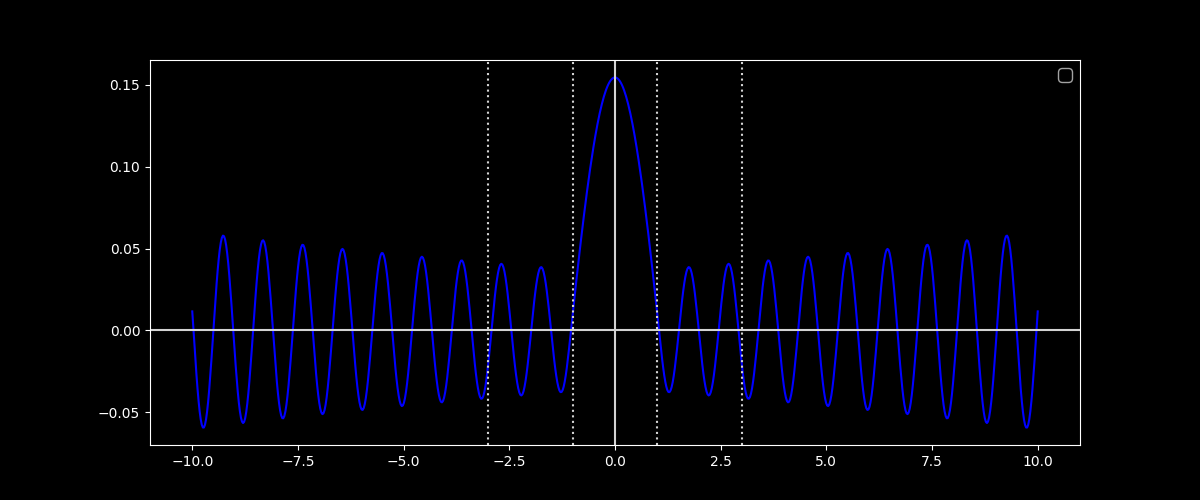

In [270]:
A.plot_field_1d(full_leaky, xs=xs, part='real', color='blue');

### Asymptotics of true and leaky mode (found with contour integral)



In [271]:
slice_at_x = 0
constant_variable = 'x'

full_z_leaky_ours = lambda z: sum([P.slice_propagate(z, slice_at=slice_at_x, constant_variable=constant_variable) for P in P_ls])
full_z = lambda z: sum([P.slice_propagate(z, slice_at=slice_at_x, constant_variable=constant_variable) for P in Ps])



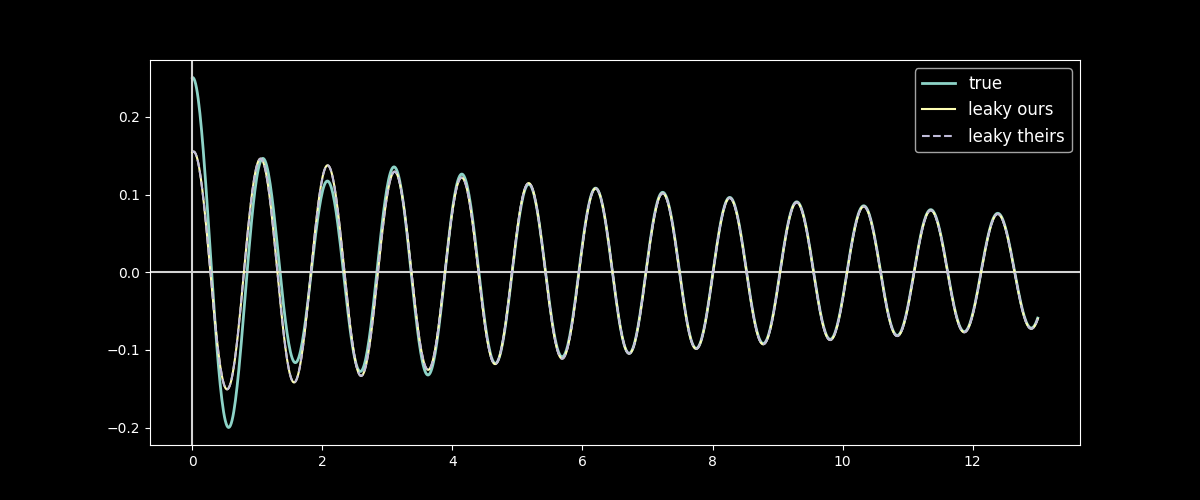

In [275]:
part = 'real'
A.plot_field_1d(full_z, xs=np.linspace(0, 13, 1000), part=part, plot_Rhos=False, linewidth=2,label='true');
A.add_1d_plot(full_z_leaky_ours, xs=np.linspace(0, 13, 1000), part=part, label='leaky ours');
A.add_1d_plot(full_z_leaky_theirs, xs=np.linspace(0, 13, 1000), part=part, linestyle='--', label='leaky theirs');


#### Issues:

- Using our method, even though there appears to be a pole in the integrand where we need it to be, when we do a circular contour integral it appears to zero out.  Everything should be right, but we get zero...  This happens for all other pole locations too: -Z, Z.conj(), -Z.conj().

- This is strange because when we do this for the delta function input everything works out: we get convergent leaky mode fields.


# Seem to have found issue: We need to use non-conjugated version of expansion and orthogonality



## Adding steepest descent path contribution

In [313]:
def sdp(x, guide=A):
    K = guide.K0 * guide.n0
    return -(K * x) / np.sqrt(K**2 + x**2)

In [330]:
xmin, xmax= -8, .5
ymin, ymax = -1, 2
xs_sdp = np.linspace(xmin, xmax, 1000)
ys_sdp = sdp(xs_sdp)
msk = np.where((ys_sdp<ymax)*(ys_sdp>ymin))

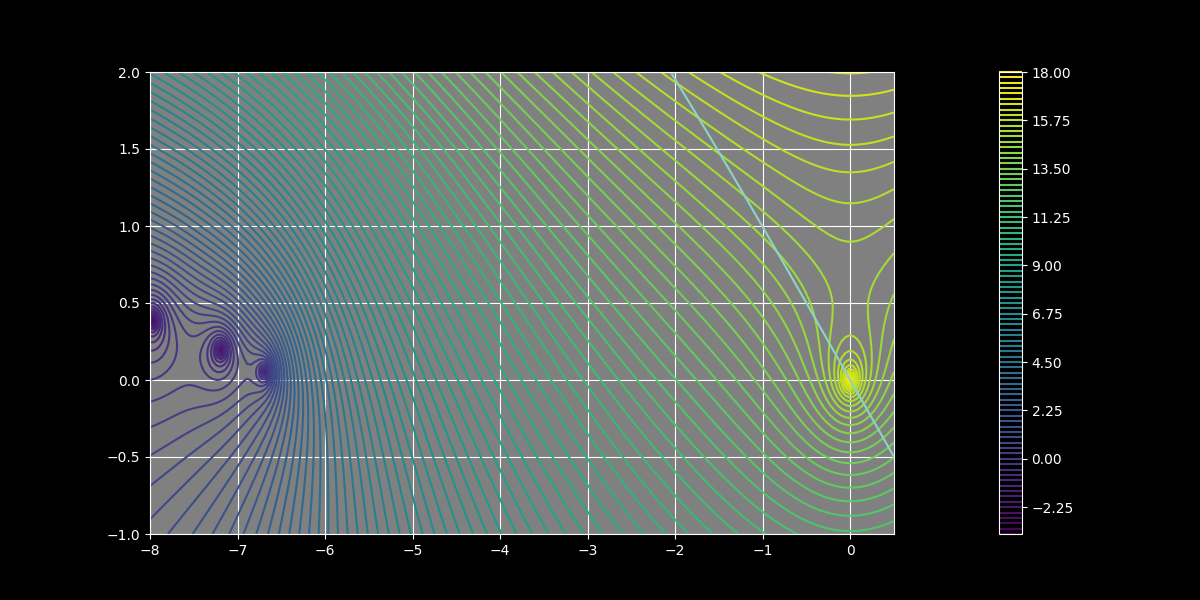

In [332]:
plotlogf(A.determinant_Z, xmin, xmax, ymin, ymax, 'TE', 'leaky', iref=200, rref=200, levels=100)
ax = plt.gca()
ax.plot(xs_sdp[msk], ys_sdp[msk]);
# ax.plot(xs[msk], -ys[msk]);

## Save data for visualization

In [178]:
propfuncs = [P1, P2, P3]
evfuncs = [P4, P5, P6, P7, P8]

In [179]:
Prop = lambda x, z: sum([f.propagate(x, zs=z) for f in propfuncs])
Ev = lambda x, z: sum([f.propagate(x, zs=z) for f in evfuncs]) 
Full = lambda x, z: Prop(x, z) + Ev(x, z)

In [195]:
xs = np.linspace(-15, 15, 1200)
zs = np.linspace(0, 20, 600)


In [196]:
f0s = f0(xs)

In [197]:
rad_ys_propagating = Prop(xs, zs)

In [198]:
rad_ys_evanescent = Ev(xs, zs)


In [199]:
Xs, Zs = np.meshgrid(xs, zs)

In [200]:
def get_trig_indices(mesh_array):
    '''Get triangle index list for three js mesh formation via indexed buffer geometry.'''
    if len(mesh_array.shape) <= 1:
        raise ValueError('Provide meshgrid array as input.')
    Nz, Nx = mesh_array.shape[0], mesh_array.shape[1]
    l_inds = Nx * Nz
    indices =  np.arange(0, l_inds).reshape((Nx, Nz)).T  # Note transpose
    fbases = indices[:Nz-1, :Nx-1].T.flatten()  # Note transpose and index switch due to transpose
    f1 = np.array([[i, i+Nz, i+1] for i in fbases], dtype=int)
    f2 = np.array([[i+1, i+Nz, i+Nz+1] for i in fbases], dtype=int)
    return np.concatenate((f1, f2))


def get_base_vertices(Xs, Zs):
    '''Get vertices of triangles with zero height (y component in three.js).'''
    if Xs.shape != Zs.shape:
        raise ValueError('Provide meshgrid arrays (ie Xs, Zs = np.meshgrid(xs,zs)) as inputs.')
    Base = np.array([Xs, np.zeros_like(Xs), Zs], dtype=float)
    L = Xs.shape[0] * Xs.shape[1]
    base_vertices = Base.T.reshape((L,3))
    return base_vertices


def create_height_array_from_complex(ys, Xs):
    '''Get data for height from complex ys input (needs to be formatted as list:
        [ys[0].real, ys[0].imag, ys[1].real, ys[1].imag, ... ].'''
    L = Xs.shape[0] * Xs.shape[1]
    Ys = np.array([ys.real, ys.imag], dtype=float)
    heights = Ys.T.reshape((L,2))
    return heights


def save_trig_indices_as_json(filepath, mesh_array):
    indices = get_trig_indices(mesh_array)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(indices.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)


def save_base_vertices_as_json(filepath, Xs, Zs):
    base_vertices = get_base_vertices(Xs, Zs)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(base_vertices.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)
        

def save_heights_as_json(filepath, ys, Xs):
    heights= create_height_array_from_complex(ys, Xs)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(heights.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)

def save_values_as_json(filepath, f0s):
    with open(filepath + '.json', 'w') as outfile:
        json.dump(f0s.tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)




In [201]:
prefix='/home/pv/local/slab/apps/antiguide/'

In [202]:
save_trig_indices_as_json(prefix + 'trig_indices_new', Xs)


In [203]:
save_base_vertices_as_json(prefix + 'base_vertices_new', Xs, Zs)


In [204]:
save_heights_as_json(prefix + 'evanescent_heights', rad_ys_evanescent, Xs)


In [205]:
save_heights_as_json(prefix + 'propagating_heights', rad_ys_propagating, Xs)


In [206]:
save_values_as_json(prefix + 'f0s', f0s)


In [207]:
save_values_as_json(prefix + 'x0s', xs)
